In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing data set
datos = pd.read_csv('german_credit.csv')
datos_origininales = datos.copy()
#Printing the first 5 rows of the data set
datos.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [320]:
datos.shape

(1000, 21)

In [321]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [322]:
columna = list(datos.select_dtypes(include=['object']).columns)
for column in columna:
    print(column)
    print(list(datos[f'{column}'].value_counts().index))
    print("\n")

account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


personal_status_sex
['male : single', 'female : divorced/separated/married', 'male : married/widowed', 'male : divorced/separated']


other_debtors
['none', 'guarantor', 'co-applicant']


proper

In [323]:

# creacion de diccionarios para las columnas categoricas
def procesar_datos():
  global datos
  datos = datos.drop_duplicates() if datos.duplicated().any() else datos
  datos = datos.dropna() if datos.isnull().values.any() else datos

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  
  datos['account_check_status'] = datos['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  datos['credit_history'] = datos['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  datos['purpose'] = datos['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  datos['savings'] = datos['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  datos['present_emp_since'] = datos['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  datos['personal_status_sex'] = datos['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  datos['other_debtors'] = datos['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  datos['property'] = datos['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  datos['other_installment_plans'] = datos['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  datos['housing'] = datos['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  datos['job'] = datos['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  datos['telephone'] = datos['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  datos['foreign_worker'] = datos['foreign_worker'].map(a)
procesar_datos()
from sklearn.preprocessing import OneHotEncoder #LabelEncoder para variables categóricas ordinales
maker_encoder = OneHotEncoder()

In [324]:
#Preparando los datos con los diccionarios antes creados
def feature_engineering():
  global datos
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  datos['sexo'] = datos['personal_status_sex'].map(dic_sexo)
  datos['estado_civil'] = datos['personal_status_sex'].map(dic_est_civil)
  datos['rango_edad'] = pd.cut(x = datos['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  datos['rango_plazos_credito']=pd.cut(x = datos['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  datos['rango_valor_credito']=pd.cut(x = datos['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  datos = datos.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])
feature_engineering()

In [325]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   credit_history              1000 non-null   int64
 3   purpose                     1000 non-null   int64
 4   savings                     1000 non-null   int64
 5   present_emp_since           1000 non-null   int64
 6   installment_as_income_perc  1000 non-null   int64
 7   other_debtors               1000 non-null   int64
 8   present_res_since           1000 non-null   int64
 9   property                    1000 non-null   int64
 10  other_installment_plans     1000 non-null   int64
 11  housing                     1000 non-null   int64
 12  credits_this_bank           1000 non-null   int64
 13  job                         1000 non-null   int64
 14  people_un

In [326]:
#Showing only the numeric variables
print(datos.select_dtypes(include=['int64', 'float64'])
      .columns)
print(datos.select_dtypes(include=['int64', 'float64']).shape)

# Todas las variables ahora son numericas


Index(['default', 'account_check_status', 'credit_history', 'purpose',
       'savings', 'present_emp_since', 'installment_as_income_perc',
       'other_debtors', 'present_res_since', 'property',
       'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker', 'sexo',
       'estado_civil', 'rango_edad', 'rango_plazos_credito',
       'rango_valor_credito'],
      dtype='object')
(1000, 22)


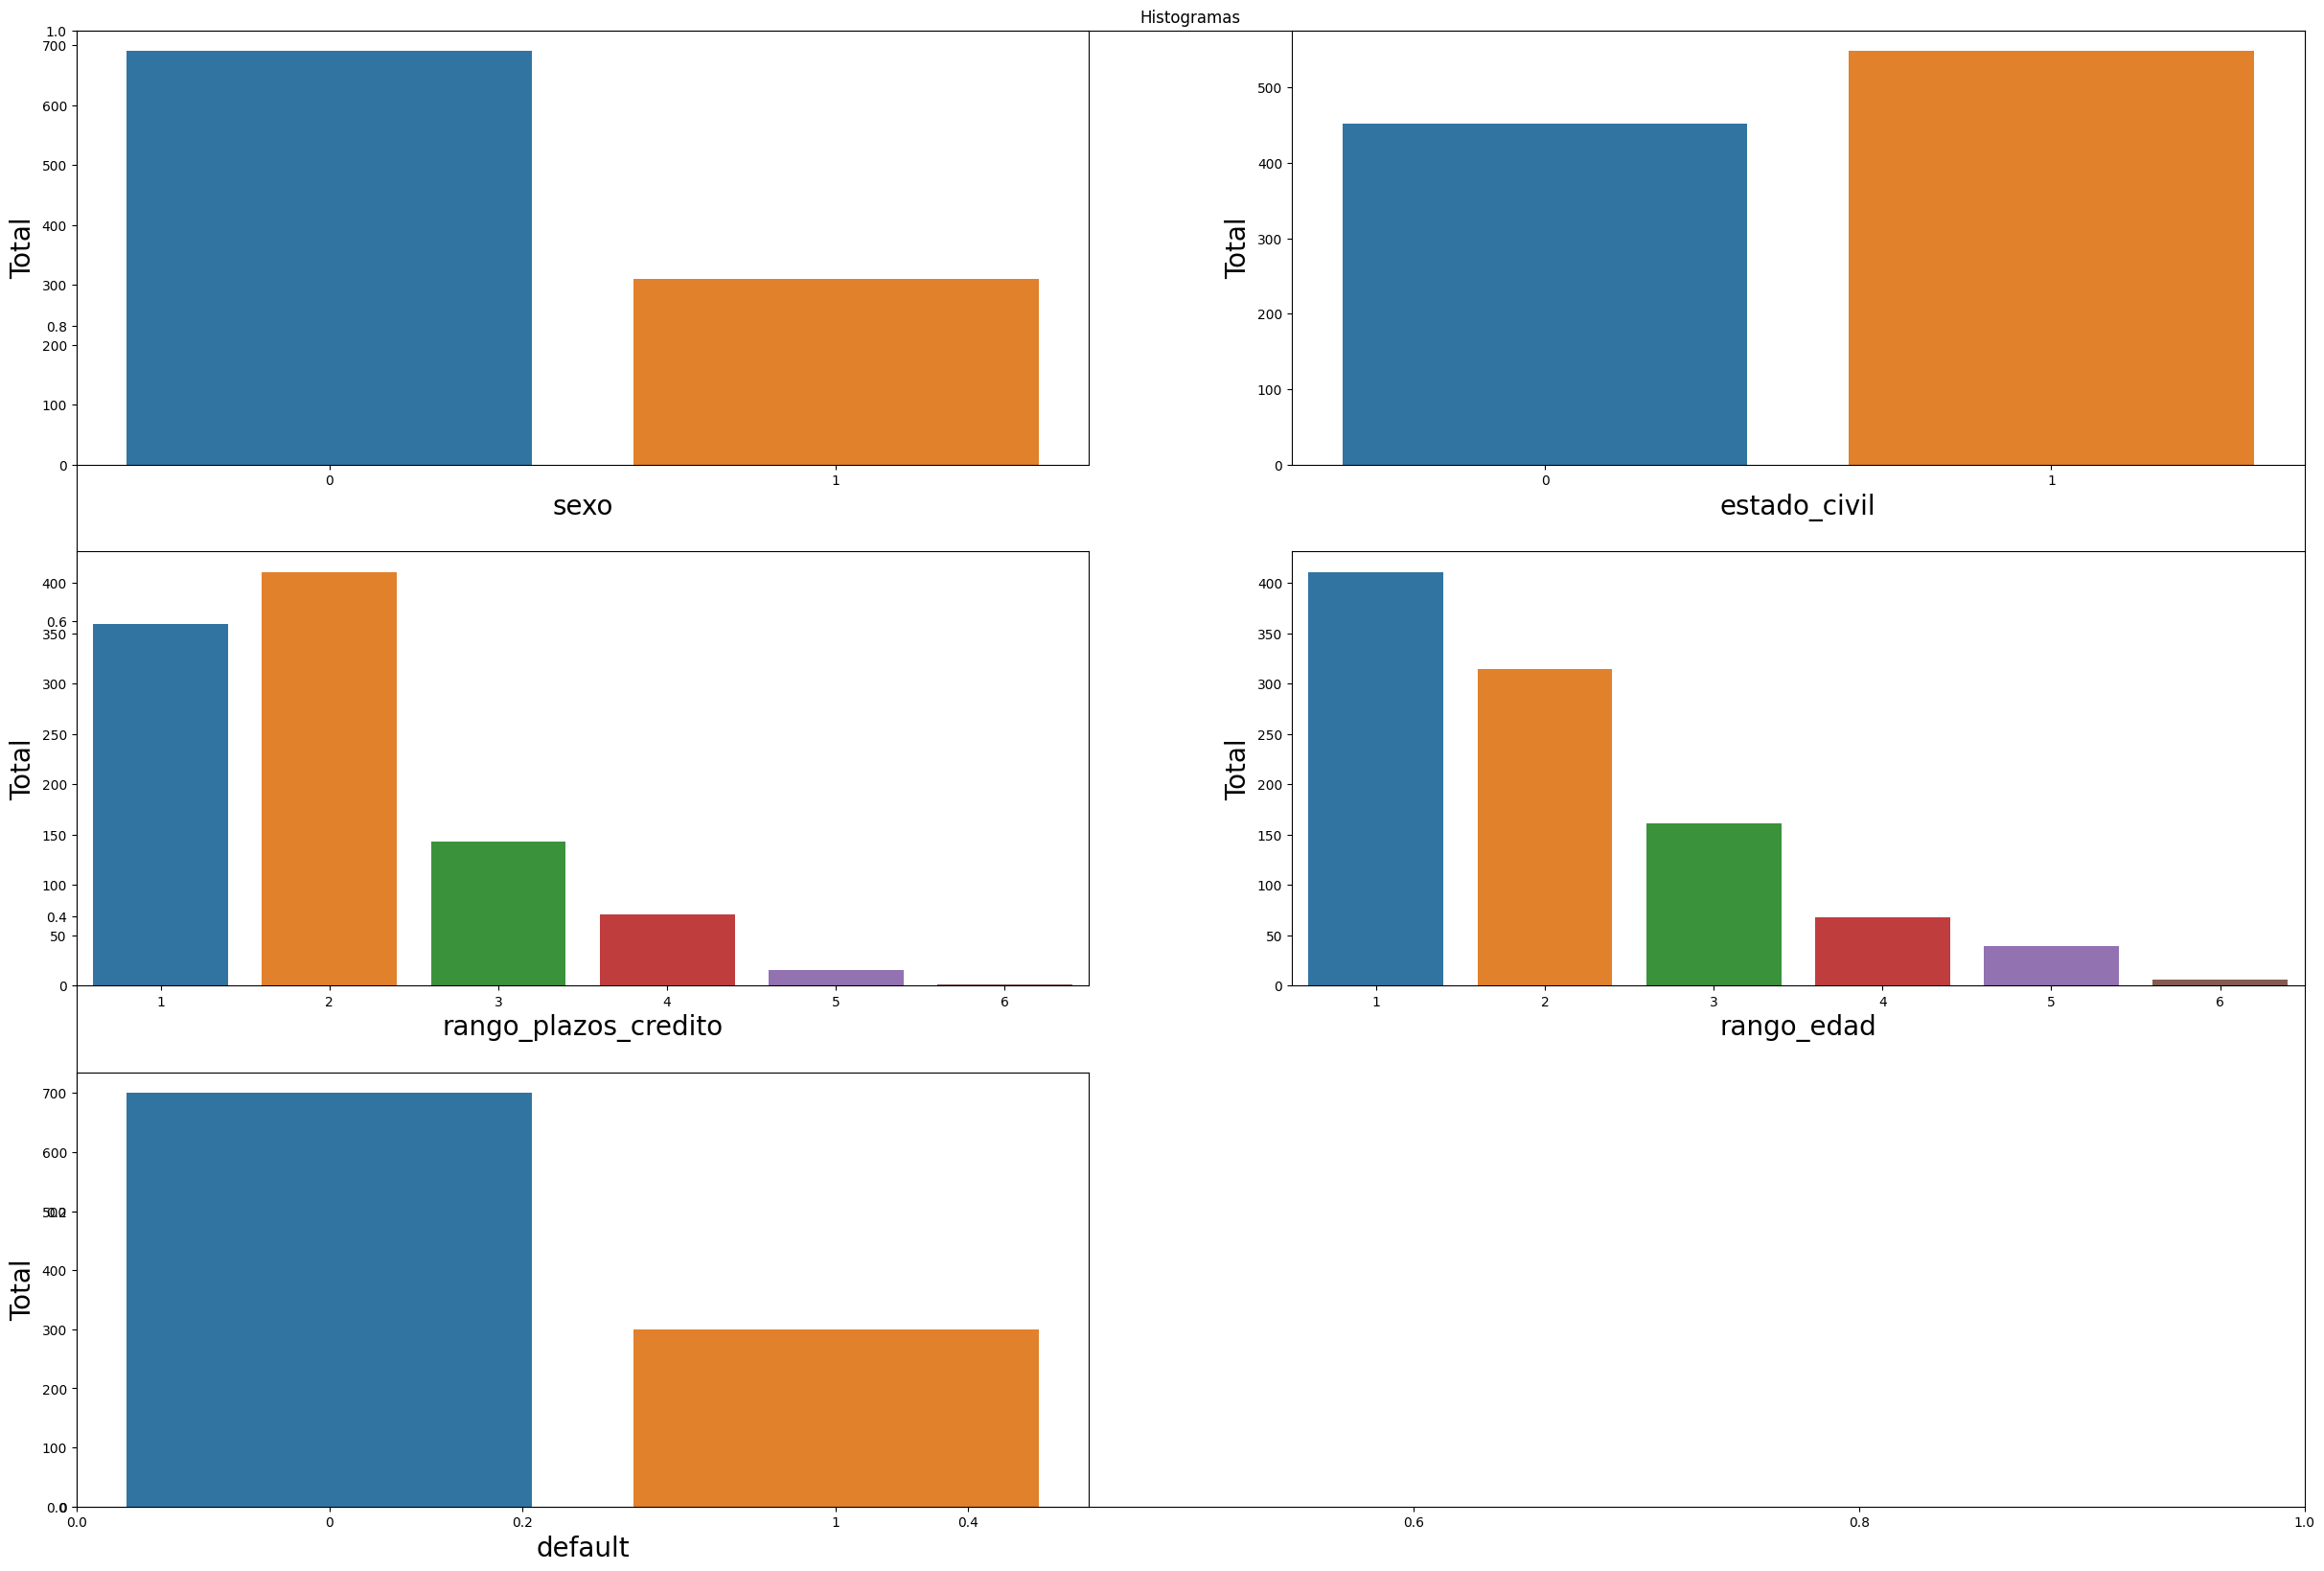

In [327]:

def analisis_exploratorio():
  global datos
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = datos)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)
analisis_exploratorio()

In [328]:
from ydata_profiling import ProfileReport
#help(ProfileReport)

In [329]:
profile = ProfileReport(datos, title = 'Report', explorative=True, dark_mode=True)
profile.config.html.minify_html = True
profile.to_file('Report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 230.49it/s]


<Axes: >

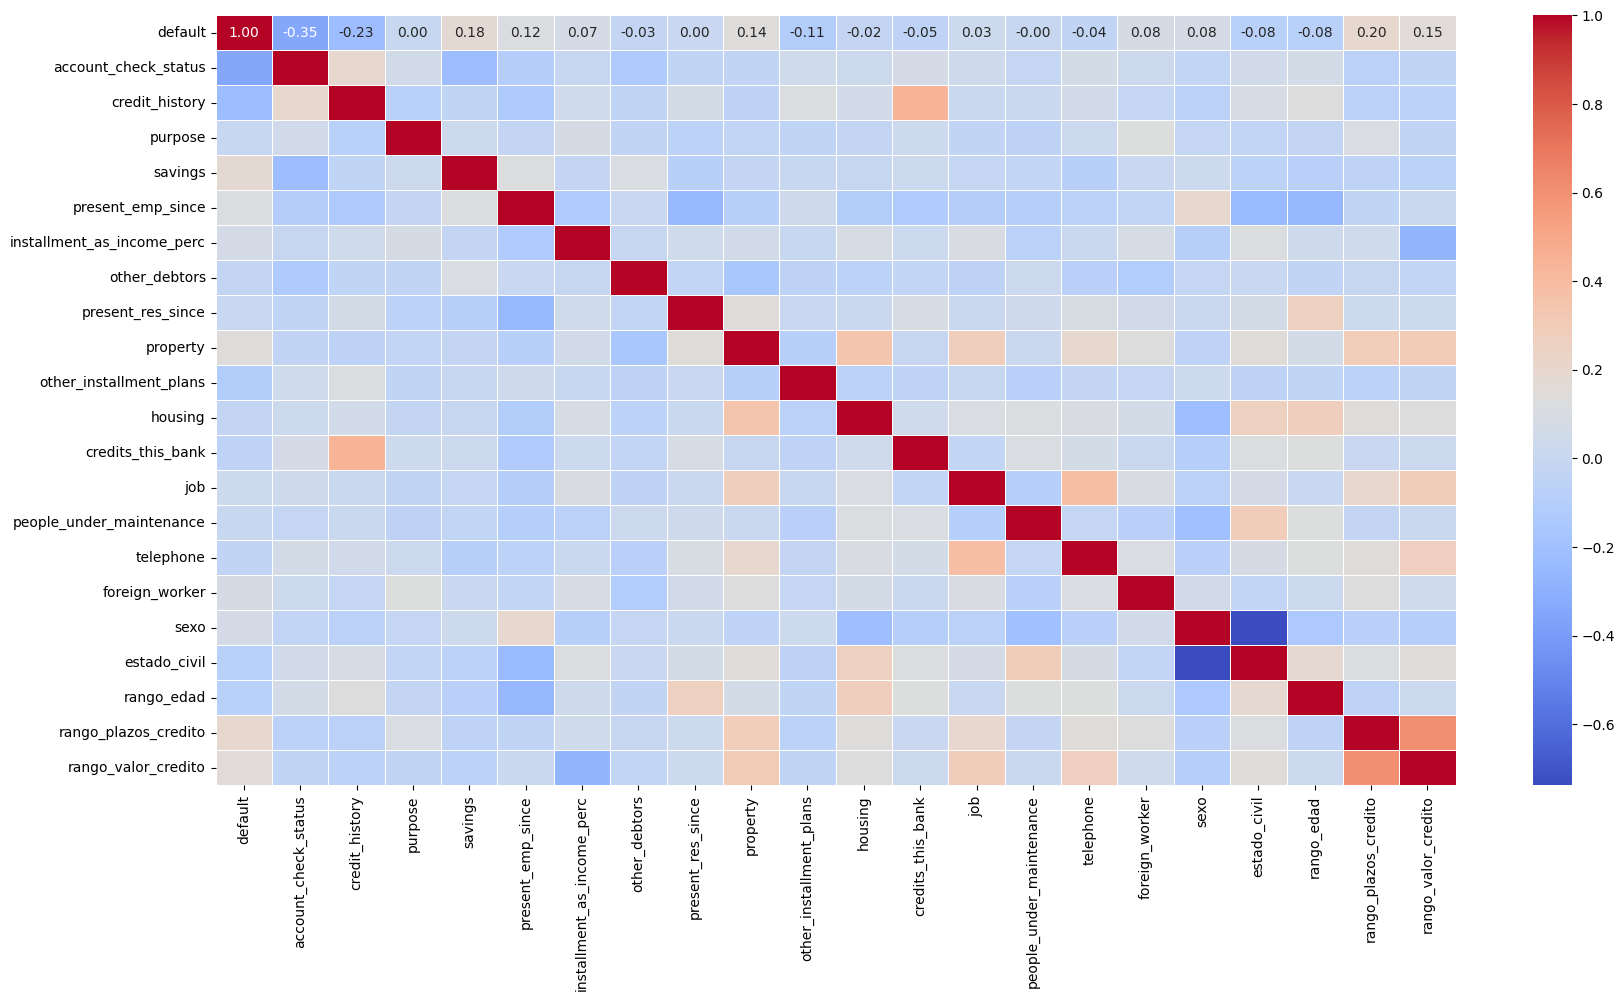

In [330]:
plt.figure(figsize=(20,10))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')

In [331]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



X = datos.drop('default', axis=1) # Variables independientes
y = datos['default'] #Variable objetivo, buen o mal pagador
#Separando en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')




Accuracy: 0.772


In [332]:
#@title
def crea_modelos():
  global datos, resultados
  y = datos['default']
  x = datos.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)
      return models, test_x, test_y

  resultados = results


In [333]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
#@title
def visualiza_resultados():
  global datos, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()



C:\Users\juanp\AppData\Local\Temp\ipykernel_11828\3529239130.py:12: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
C:\Users\juanp\AppData\Local\Temp\ipykernel_11828\3529239130.py:12: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)


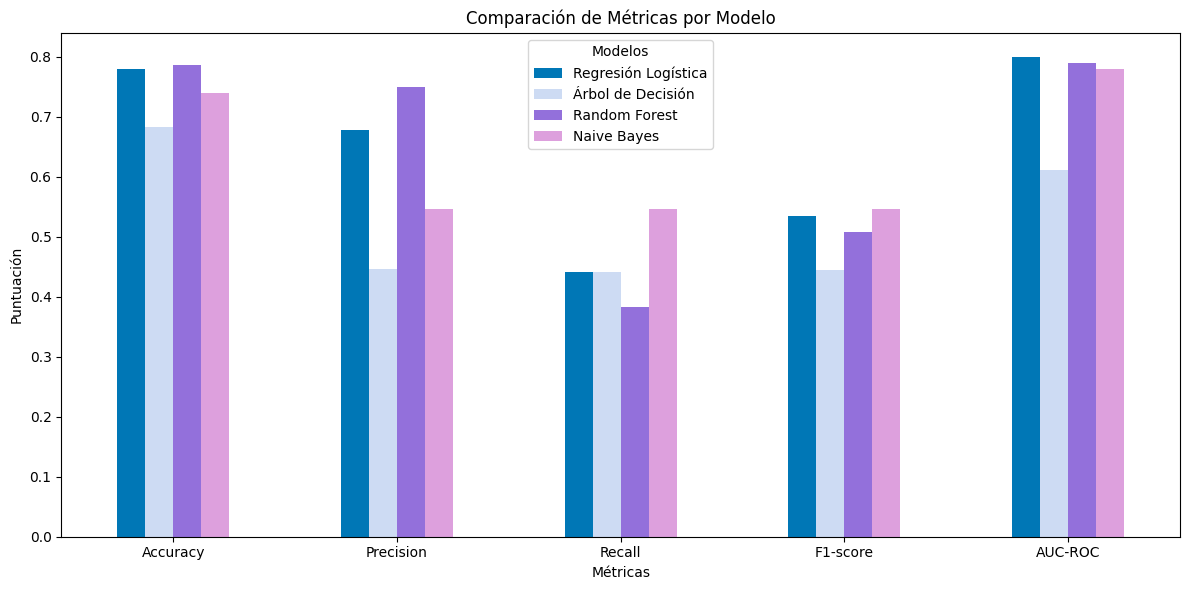

In [ ]:
visualiza_resultados()

In [ ]:
from sklearn.metrics import confusion_matrix
crea_modelos()

def confusion_matrices():
    global datos, resultados
    models, test_x, test_y = crea_modelos()
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)
    
    for name, model in models.items():
        predictions = model.predict(test_x)
        cm = confusion_matrix(test_y, predictions)
        cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
        print(f"Confusion Matrix for {name}:")
        print(cm_df)
        print("\n")
confusion_matrices()

c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\juanp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Confusion Matrix for Regresión Logística:
          Predicted 0  Predicted 1
Actual 0          196           18
Actual 1           48           38


Confusion Matrix for Árbol de Decisión:
          Predicted 0  Predicted 1
Actual 0          169           45
Actual 1           46           40


Confusion Matrix for Random Forest:
          Predicted 0  Predicted 1
Actual 0          204           10
Actual 1           52           34


Confusion Matrix for Naive Bayes:
          Predicted 0  Predicted 1
Actual 0          175           39
Actual 1           39           47




# +

In [ ]:
datos_2 = datos_origininales.copy()
datos_2.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
datos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
datos_2 = datos_2.rename(columns={'default': 'target'})
categoricas = list(datos_2.select_dtypes(include=['object']).columns)
numericas = list(datos_2.select_dtypes(include=['int64', 'float64']).columns)

In [ ]:
# Analisis de escalas entre las variables numericas para ver si es necesario el feature scaling

datos_2[numericas].describe()

,target,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
# Ciertas variables por su manera de comportamiento se pueden considerar como variables categoricas, por lo que se van a convertir a categoricas
# variables = present_res_since, people_under_maintenance, target, predict_this_bank, installment_as_income_perc
def convierte_categoricas():
    global datos_2
    datos_2['present_res_since'] = datos_2['present_res_since'].astype('object')
    datos_2['people_under_maintenance'] = datos_2['people_under_maintenance'].astype('object')
    datos_2['target'] = datos_2['target'].astype('object')
    datos_2['credits_this_bank'] = datos_2['credits_this_bank'].astype('object')
    datos_2['installment_as_income_perc'] = datos_2['installment_as_income_perc'].astype('object')
convierte_categoricas()
datos_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   target                      1000 non-null   object
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   object
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   object
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [ ]:
categoricas = list(datos_2.select_dtypes(include=['object']).columns)
numericas = list(datos_2.select_dtypes(include=['int64', 'float64']).columns)

In [ ]:
datos_2[numericas].describe()


,duration_in_month,credit_amount,age
count,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,35.546000
std,12.058814,2822.736876,11.375469
min,4.000000,250.000000,19.000000
25%,12.000000,1365.500000,27.000000
50%,18.000000,2319.500000,33.000000
75%,24.000000,3972.250000,42.000000
max,72.000000,18424.000000,75.000000


/home/juan/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/juan/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/juan/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


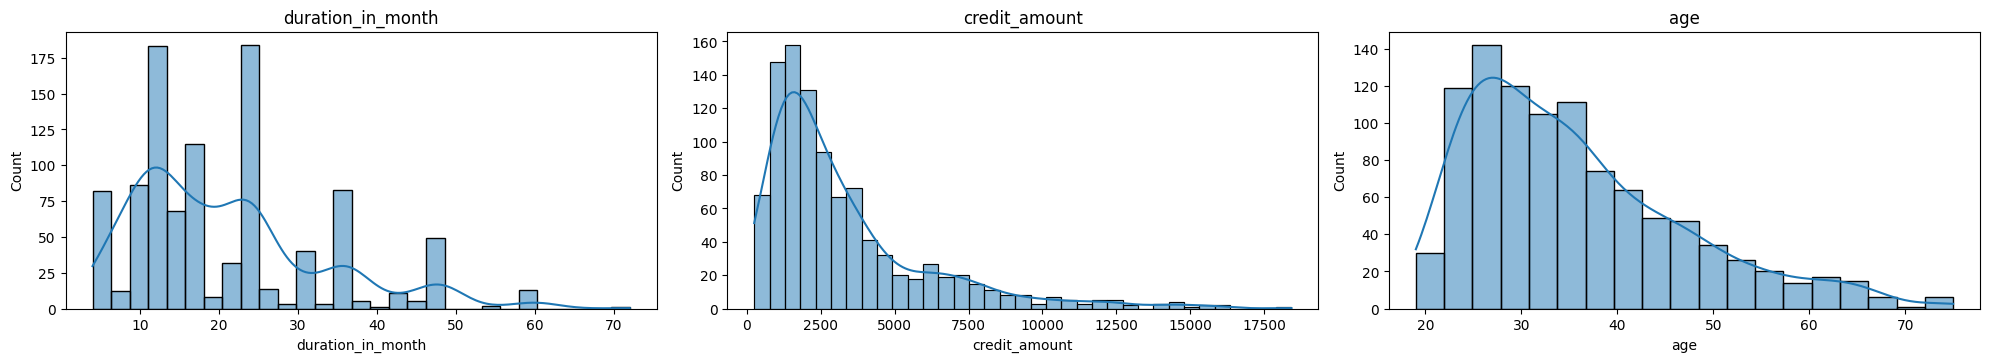

In [ ]:
# Se observa que las variables tienen escalas muy diferentes, sin embargo se va a usar seaborn o matplotlib para visualizar mejor la distribucion de las variables (ya fueron importadas antes)

def visualiza_distribucion():
    global datos_2
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(numericas):
        plt.subplot(3, 3, i+1)
        sns.histplot(datos_2[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show(block=False)
visualiza_distribucion()


#Se ve que estas diferencias eran casos especiales de variables ahora se ve que las escalas estan bien por lo que no se va a hacer feature scaling

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import joblib
import pickle
from sklearn.pipeline import Pipeline



In [ ]:
datos_2[numericas]

,duration_in_month,credit_amount,age
0,6,1169,67
1,48,5951,22
2,12,2096,49
3,42,7882,45
4,24,4870,53
...,...,...,...
995,12,1736,31
996,30,3857,40
997,12,804,38
998,45,1845,23


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [ ]:
#numericas
numericas

#puthing credit_amount to the end
numericas = [x for x in numericas if x != 'credit_amount']
numericas.append('credit_amount')
numericas


['duration_in_month', 'age', 'credit_amount']

In [318]:
categoricas

In [279]:
datos_2[:-1]

,target,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0,< 0 DM,36,existing credits paid back duly till now,radio/television,3959,... < 100 DM,unemployed,4,male : single,...,3,if not A121 : building society savings agreeme...,30,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
994,0,no checking account,12,existing credits paid back duly till now,car (new),2390,unknown/ no savings account,.. >= 7 years,4,male : single,...,3,"if not A121/A122 : car or other, not in attrib...",50,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes


In [295]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categoricas),
    ('scaler', StandardScaler(), numericas[:-1])
], n_jobs=-1)



X = ct.fit_transform(datos_2)
y = datos_2['target'].astype('category').cat.codes


AttributeError: 'csr_matrix' object has no attribute 'drop'

In [270]:


# Creating train and validation splits
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [277]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_feat_idx = indices[:5]
top_feats = [ct.get_feature_names_out()[i] for i in top_feat_idx]
for i in range(5):
    print(f"{i+1}. {top_feats[i]}: {importances[indices[i]]}")


1. encoder__target_1: 0.47239856268171776
2. encoder__target_0: 0.34866880143120443
3. scaler__duration_in_month: 0.0177584898580105
4. encoder__account_check_status_no checking account: 0.015119202356025681
5. encoder__account_check_status_< 0 DM: 0.013791349950149965


In [268]:
# Creating train and validation splits
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Calculating evaluation metrics
y_pred = rf.predict(X_val)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1_score = f1_score(y_val, y_pred, average='macro')

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}\n")

# Computing feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_feat_idx = indices[:5]  # Customize this number to get top N features

feature_names = np.concatenate((np.char.add(['C'], categoricas), numericas))

# Plotting top feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(feature_names[top_feat_idx], importances[top_feat_idx], align='center')
plt.xlim([0, 0.15]);
plt.show();

# Visualizing cumulative importance curve
importances_sum = np.cumsum(importances) / np.cumsum(importances)[-1]
plt.plot(importances_sum, color='darkblue', linestyle='--', marker='o', markersize=4)
plt.xlabel('Proportion of explained variance')
plt.ylabel('Number of features')
plt.axhline(y=0.95, color='gray', linestyle='--');
plt.title('Cumulative Importance Curve');

TypeError: 'numpy.float64' object is not callable

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np
X = datos.drop('default', axis=1) # Variables independientes
y = datos['default'] #Variable objetivo, buen o mal pagador
#Separando en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(np.array([len(X_train), len(X_test),len(y_train), len(y_test)]))


[750 250 750 250]


In [ ]:
# Serializando 

joblib.dump(make_enconder, 'make_enconder.joblib')

make_enconder = joblib.load('make_enconder.joblib')

